In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

def display_images(image_path1, image_path2):
        # read images
        img_A = mpimg.imread(image_path1)
        img_B = mpimg.imread(image_path2)

        # pad top with white space
        larger = max(img_A.shape[0], img_B.shape[0])
        img_A = np.pad(img_A, ((larger - img_A.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)
        img_B = np.pad(img_B, ((larger - img_B.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)

        # stack
        img = np.concatenate((img_A, img_B), axis=1)
        # save tmp image
        tmp_path = 'tmp.png'
        plt.imsave(tmp_path, img)
        return Image(tmp_path, width=600)

In [ ]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb \
    --outname baseline \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_5kb.ckpt \
    --matrix-size 512 \
    --resolution 4096 \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --min-val-pred 0.5 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/ctcf.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k4me3.bw

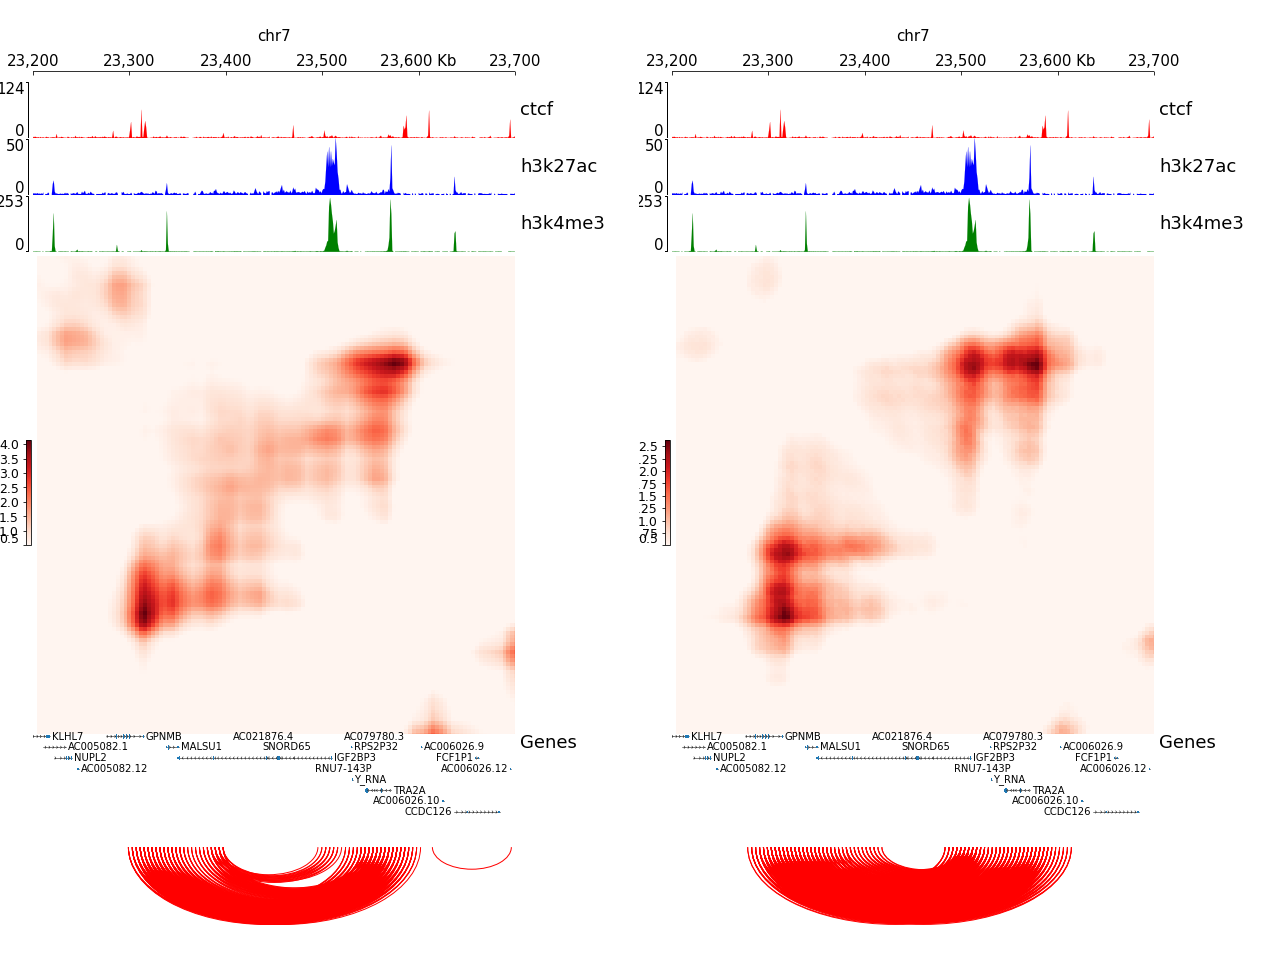

In [8]:
display_images('outputs/baseline_hESC_WT_5kb_chr7_23000000_ctcf_true_tracks.png', 
               'outputs/baseline_hESC_WT_5kb_chr7_23000000_ctcf_pred_tracks.png')

In [9]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb \
    --outname ctcf_ko_only \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_5kb.ckpt \
    --matrix-size 512 \
    --resolution 4096 \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23580000 \
    --ko-width 10000 \
    --ko ctcf \
    --ko-mode knockout \
    --min-val-pred 0.5 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/ctcf.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k4me3.bw

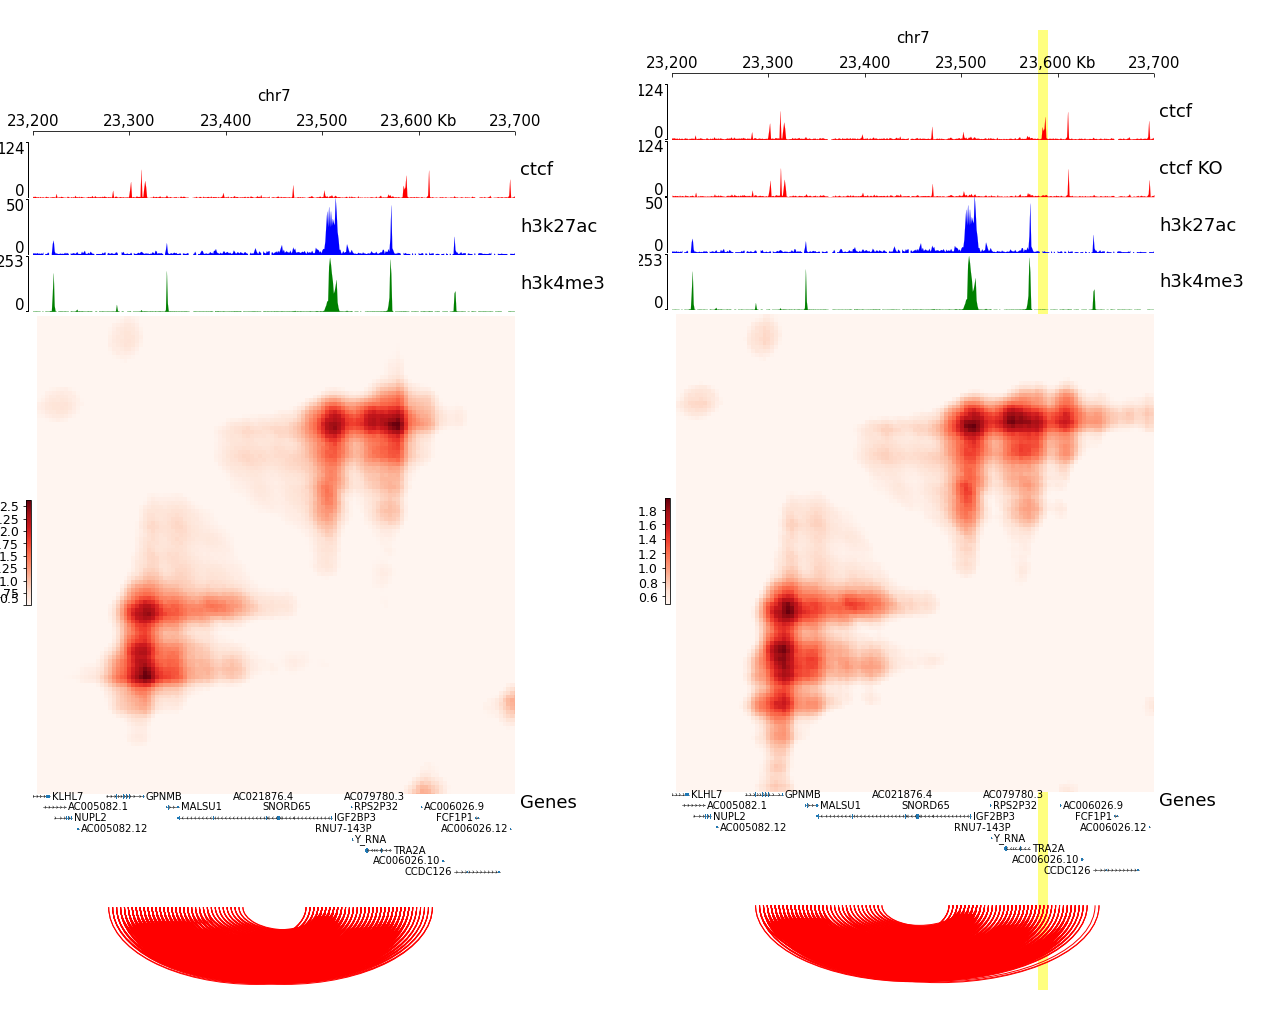

In [10]:
display_images('outputs/ctcf_ko_only_hESC_WT_5kb_chr7_23000000_ctcf_pred_tracks.png', 
               'outputs/ctcf_ko_only_hESC_WT_5kb_chr7_23000000_ctcf_ko_tracks.png')

In [11]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb \
    --outname ctcf_ko_only \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_5kb.ckpt \
    --matrix-size 512 \
    --resolution 4096 \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23580000 \
    --ko-width 10000 \
    --ko ctcf \
    --ko-mode knockout \
    --plot-diff \
    --min-val-pred 0.5 \
    --min-val-diff -0.5 \
    --max-val-diff 0.5 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/ctcf.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k4me3.bw

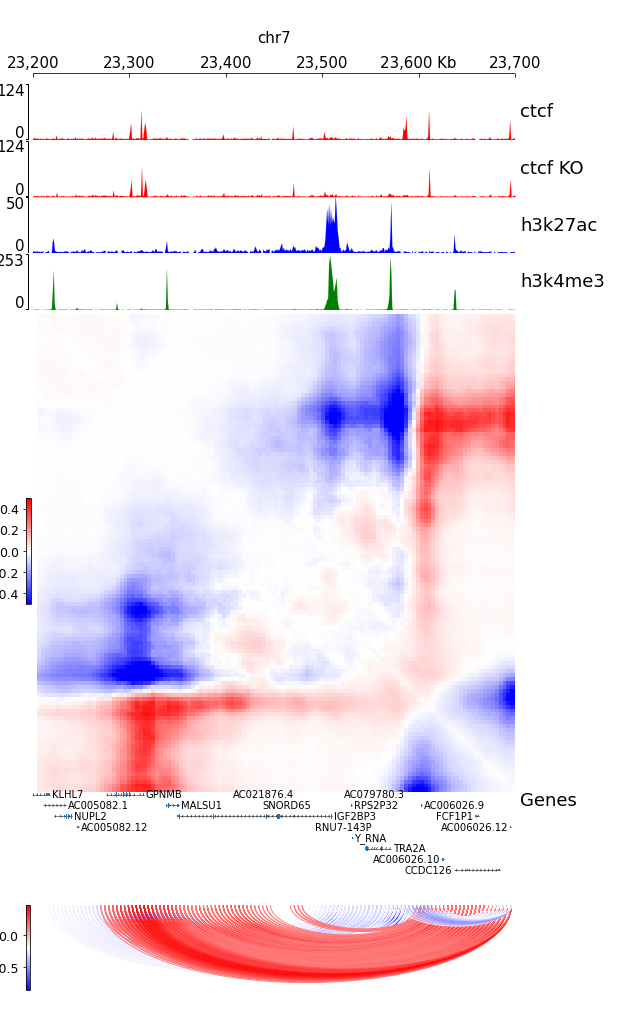

In [13]:
Image(filename='outputs/ctcf_ko_only_hESC_WT_5kb_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

In [18]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_5kb \
    --outname snp \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_5kb.ckpt \
    --matrix-size 512 \
    --resolution 4096 \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --var-pos 23584702 \
    --alt T \
    --plot-diff \
    --min-val-diff -0.001 \
    --max-val-diff 0.001 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/ctcf.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_5kb/genomic_features/h3k4me3.bw

Variant pos: 23584702, alt base: T
Pos: 584701, Alt: T, Ref: C
CTACTGACAT*C*TAGTGGGTA


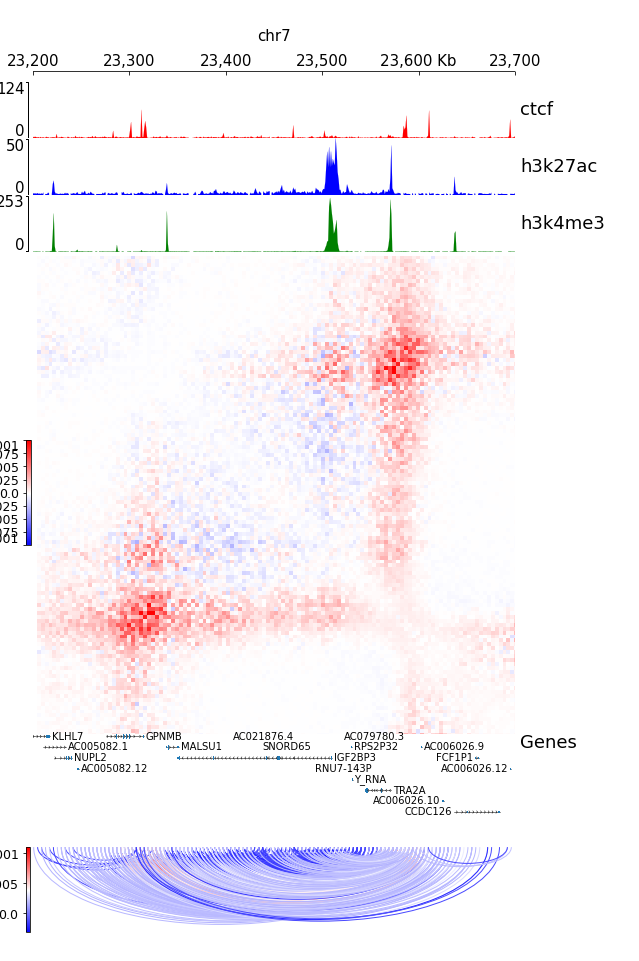

In [19]:
Image(filename='outputs/snp_hESC_WT_5kb_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)